In [76]:
import sqlite3
from sqlalchemy import create_engine
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Load Data from World Forest Data

In [77]:
# Full path to the SQLite database file
db_path = '../data/world_forest_data.sqlite'

# Create an engine that connects to the SQLite database
engine = create_engine(f'sqlite:///{db_path}')

# Query the database and load data into a DataFrame
query = "SELECT * FROM world_forest_data"
df_forest_area = pd.read_sql_query(query, engine)

# Display the DataFrame
df_forest_area.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
1,Albania,28.788321,28.717153,28.645985,28.574818,28.503650,28.432482,28.361314,28.290146,28.218978,...,28.646606,28.698558,28.750511,28.802464,28.802190,28.792062,28.791971,28.791971,28.791971,28.791971
2,Algeria,0.699908,0.696214,0.692519,0.688824,0.685129,0.681435,0.677740,0.674045,0.670350,...,0.811675,0.814866,0.818057,0.821248,0.821248,0.815790,0.810332,0.814110,0.818309,0.822228
3,American Samoa,90.350000,90.180000,90.010000,89.840000,89.670000,89.500000,89.330000,89.160000,88.990000,...,86.850000,86.700000,86.550000,86.400000,86.250000,86.100000,85.950000,85.800000,85.650000,85.500000
4,Andorra,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,...,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553


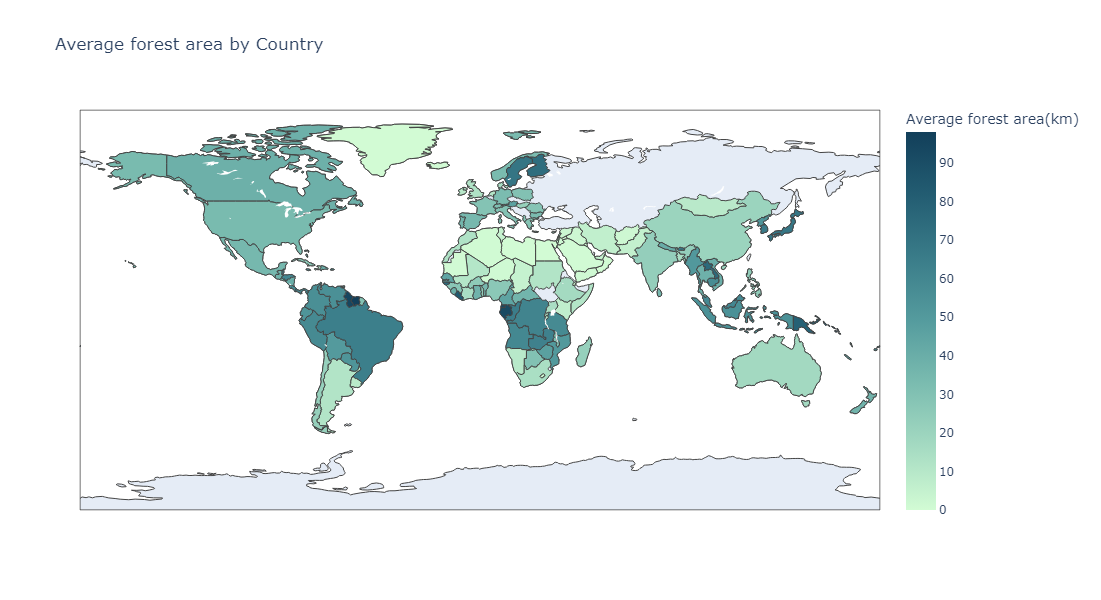

In [55]:
x_column = 'Country Name'  


df_forest_area['avgForestArea'] = df_forest_area.drop(columns=x_column).mean(axis=1)

# Calculate average temperature across years for each country


fig = px.choropleth(df_forest_area, locations='Country Name', locationmode='country names', color='avgForestArea',
                    hover_name='Country Name', color_continuous_scale='darkmint',
                    labels={'avgForestArea': 'Average forest area(km)'},
                    title='Average forest area by Country')
fig.update_layout(
    width=900,  # Width of the plot in pixels
    height=600,  # Height of the plot in pixels
)
# Show the plot
fig.show()


## Load Data from Global Temprature Data

In [78]:
# Full path to the SQLite database file
db_path = '../data/global_temperature_data.sqlite'

# Create an engine that connects to the SQLite database
engine = create_engine(f'sqlite:///{db_path}')

# Query the database and load data into a DataFrame
query = "SELECT * FROM global_temperature_data"
df_temp_changes = pd.read_sql_query(query, engine)

# Display the DataFrame
df_temp_changes.head()

,ObjectId,Country Name,Unit,Change,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,"Afghanistan, Islamic Rep. of",Degree Celsius,Surface Temperature Change,0.847,-0.058,-0.214,0.292,0.554,0.474,...,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
1,2,Albania,Degree Celsius,Surface Temperature Change,0.814,-0.263,0.105,0.117,1.370,-0.136,...,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
2,3,Algeria,Degree Celsius,Surface Temperature Change,1.270,0.034,-0.318,0.541,0.720,0.583,...,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317
3,5,"Andorra, Principality of",Degree Celsius,Surface Temperature Change,1.724,0.215,0.368,0.175,1.502,1.245,...,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401,1.367
4,6,Angola,Degree Celsius,Surface Temperature Change,0.808,0.440,0.606,0.401,0.373,0.880,...,0.576,1.090,0.879,1.430,1.847,1.064,1.504,1.975,1.387,1.631


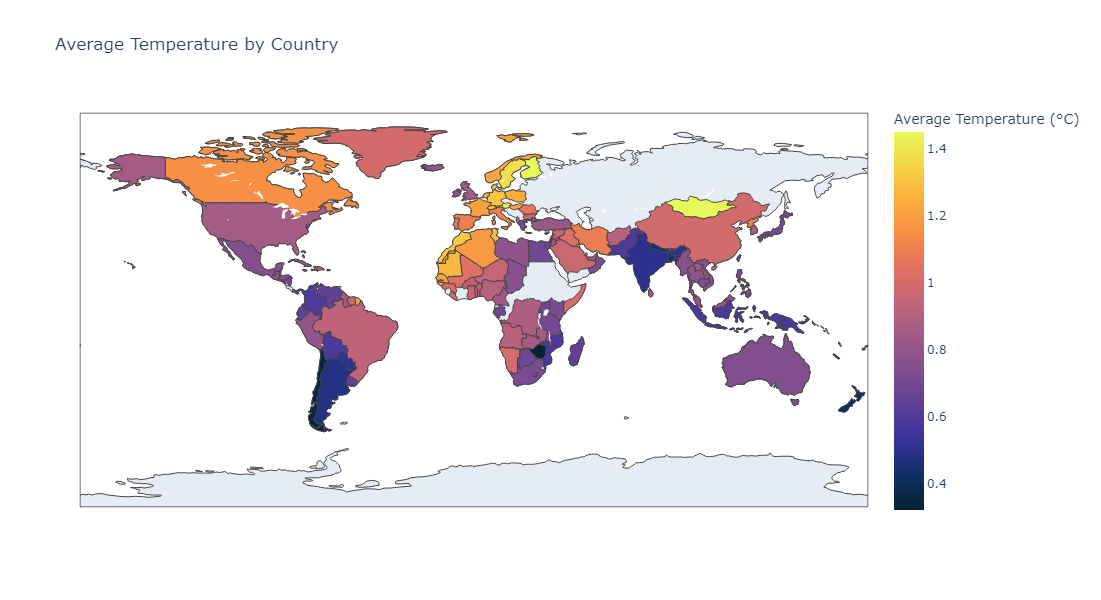

In [67]:
import pandas as pd
import plotly.express as px

# Select the column to use for the x-axis
x_column = 'Country Name'  
exclude_column1='ObjectId'
exclude_column3='Unit'
exclude_column2='Change '


# Compute the mean of the remaining columns for each row
columns_to_exclude = [x_column, exclude_column1, exclude_column2, exclude_column3]
df_temp_changes['Avg_Temperature'] = df_temp_changes.drop(columns=columns_to_exclude).mean(axis=1)

# Calculate average temperature across years for each country


fig = px.choropleth(df_temp_changes, locations='Country Name', locationmode='country names', color='Avg_Temperature',
                    hover_name='Country Name', color_continuous_scale='thermal',
                    labels={'Avg_Temperature': 'Average Temperature (°C)'},
                    title='Average Temperature by Country')
fig.update_layout(
    width=900,  # Width of the plot in pixels
    height=600,  # Height of the plot in pixels
)
# Show the plot
fig.show()


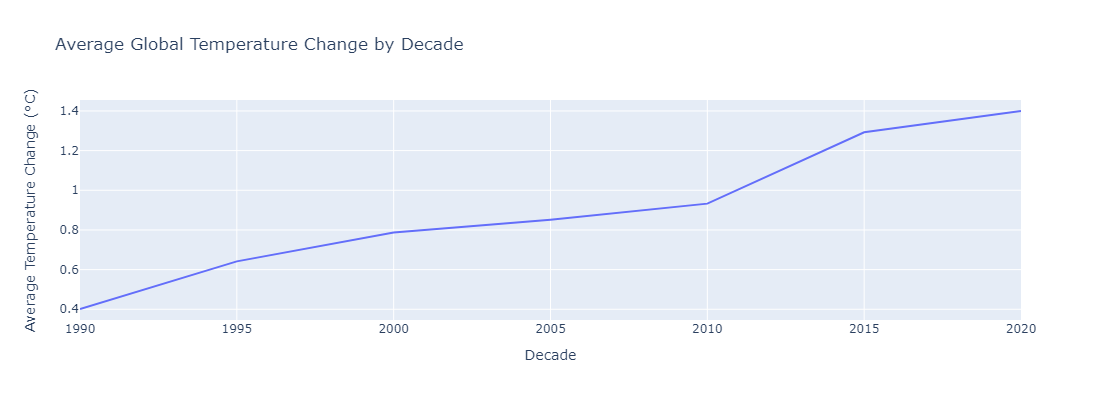

In [69]:
# Remove 'Country Name' column for aggregation
df_temp_changes.set_index('Country Name', inplace=True)

# Convert to long format
df_temp_melted = df_temp_changes.reset_index().melt(id_vars=["Country Name"], var_name="Year", value_name="Temperature Change")

# Convert 'Year' column to integer type
df_temp_melted = df_temp_melted[df_temp_melted['Year'].str.isnumeric()]
df_temp_melted['Year'] = df_temp_melted['Year'].astype(int)

# Aggregate data by decade
df_temp_melted['Decade'] = (df_temp_melted['Year'] // 5) * 5
df_decade_avg = df_temp_melted.groupby('Decade')['Temperature Change'].mean().reset_index()

# Plot with Plotly
fig = px.line(df_decade_avg, x='Decade', y='Temperature Change',
              title='Average Global Temperature Change by Decade',
              labels={'Temperature Change': 'Average Temperature Change (°C)', 'Decade': 'Decade'})

fig.update_layout(width=800, height=400)
fig.show()

# Analysis of how temprature changes affect the global temprature

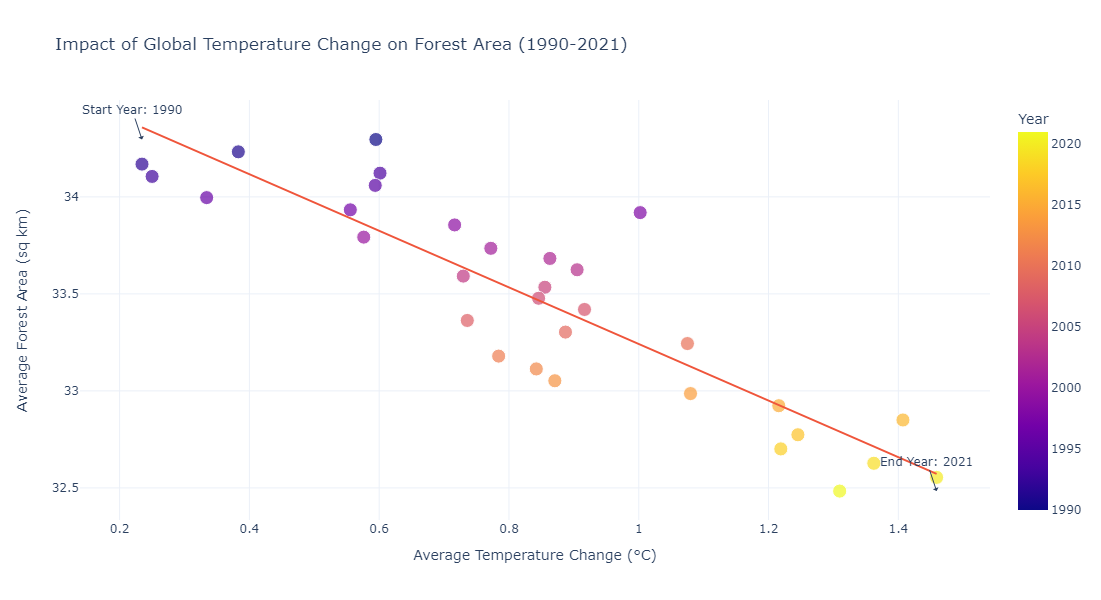

In [83]:
df_temp_melted = df_temp_changes.melt(id_vars=["Country Name"], var_name="Year", value_name="Temperature Change")
df_forest_melted = df_forest_area.melt(id_vars=["Country Name"], var_name="Year", value_name="Forest Area")

# Convert 'Year' column to integer type
df_temp_melted = df_temp_melted[df_temp_melted['Year'].str.isnumeric()]
df_temp_melted['Year'] = df_temp_melted['Year'].astype(int)
df_forest_melted['Year'] = df_forest_melted['Year'].astype(int)

# Merge the two dataframes on 'Country Name' and 'Year'
df_merged = pd.merge(df_temp_melted, df_forest_melted, on=["Country Name", "Year"], how="inner")

# Calculate average temperature change and forest area by year
df_avg = df_merged.groupby('Year').agg({
    'Temperature Change': 'mean',
    'Forest Area': 'mean'
}).reset_index()

# Create scatter plot with enhanced features
fig = px.scatter(df_avg, x='Temperature Change', y='Forest Area',
                 title='Global Forest Area vs. Temperature Change',
                 labels={'Temperature Change': 'Average Temperature Change (°C)', 'Forest Area': 'Average Forest Area (sq km)'},
                 color='Year', size='Year', size_max=10, hover_name='Year',
                 trendline='ols')

# Update layout for better readability and interaction
fig.update_layout(
    height=600,
    width=800,
    title='Impact of Global Temperature Change on Forest Area (1990-2021)',
    xaxis_title='Average Temperature Change (°C)',
    yaxis_title='Average Forest Area (sq km)',
    template='plotly_white'
)

# Adding annotations for key points
fig.add_annotation(x=df_avg['Temperature Change'].min(), y=df_avg['Forest Area'].max(),
                   text="Start Year: 1990", showarrow=True, arrowhead=1)
fig.add_annotation(x=df_avg['Temperature Change'].max(), y=df_avg['Forest Area'].min(),
                   text="End Year: 2021", showarrow=True, arrowhead=1)

fig.show()